### Explore the summary stats by plotting the histogram

In [1]:
%load_ext autoreload
%autoreload 2

In [55]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [63]:
data = np.load('../../../arco_sims/Arco_data_our_sumstats_v1.npz', allow_pickle=True)

x = torch.as_tensor(data['data'], dtype=torch.float32)
theta_not_standardized = torch.as_tensor(data['params'], dtype=torch.float32)

In [64]:
x_not_standardized = deepcopy(x)

In [65]:
x_mean = x.mean(dim=0)
x_std = x.std(dim=0)

x = (x-x_mean) / x_std
x = x.numpy()

### Load x_o

In [66]:
x_o = torch.as_tensor(np.load('../results/observation/x_o.npz')['x_o'], dtype=torch.float32)

x_o = (x_o - x_mean) / x_std
x_o = x_o.unsqueeze(0)
x_o = x_o.numpy()

Minimum:   -0.5026112
Maximum:   144.00726


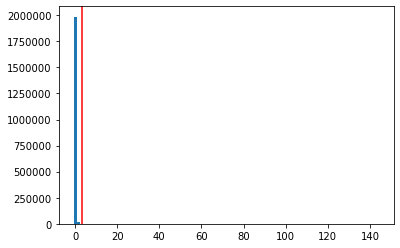

Minimum:   -3.4718857
Maximum:   3.2264469


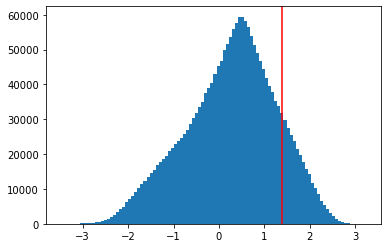

Minimum:   -2.3113437
Maximum:   6.513119


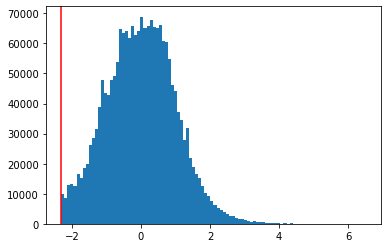

Minimum:   -1.8772336
Maximum:   6.439319


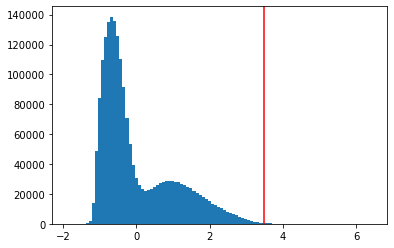

Minimum:   -0.77903575
Maximum:   3.323812


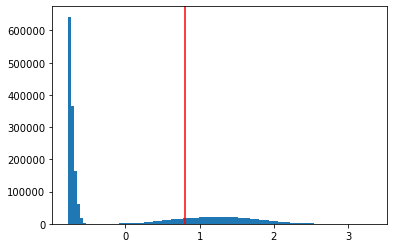

Minimum:   -4.8147345
Maximum:   4.24583


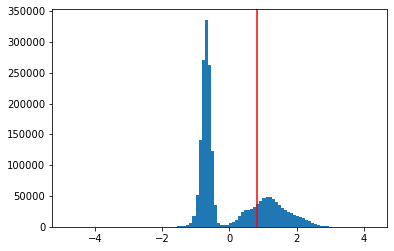

Minimum:   -1.0283314
Maximum:   19.26799


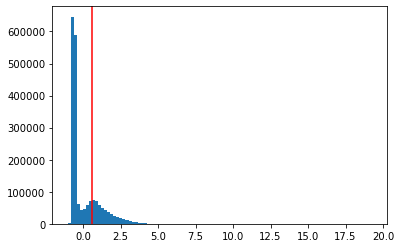

Minimum:   -0.4586134
Maximum:   103.25207


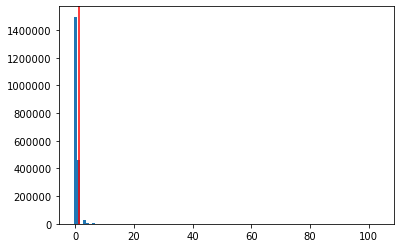

Minimum:   -3.3019373
Maximum:   4.142382


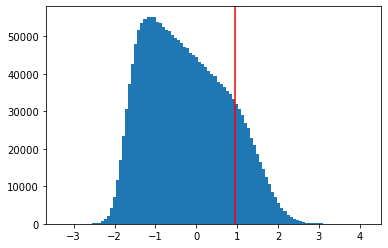

Minimum:   -2.3062153
Maximum:   6.5049815


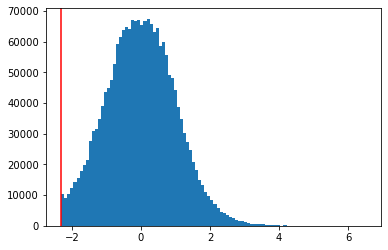

Minimum:   -1.6661698
Maximum:   8.441355


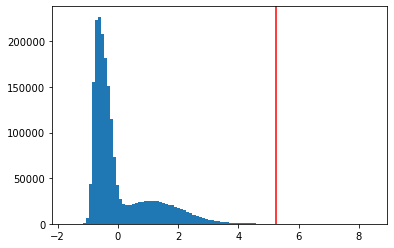

Minimum:   -0.6303328
Maximum:   13.509728


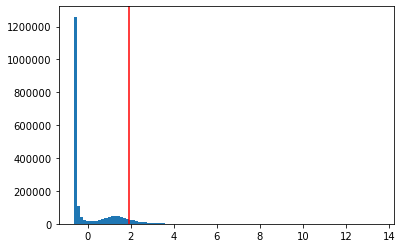

Minimum:   -3.8556347
Maximum:   5.577899


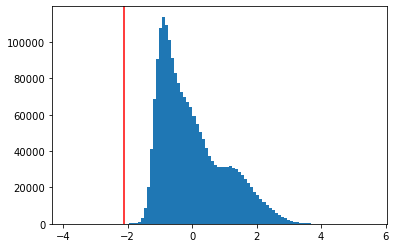

Minimum:   -1.5764029
Maximum:   12.481177


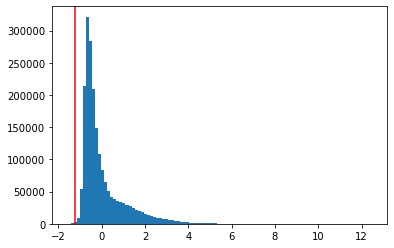

Minimum:   -0.36268437
Maximum:   138.75713


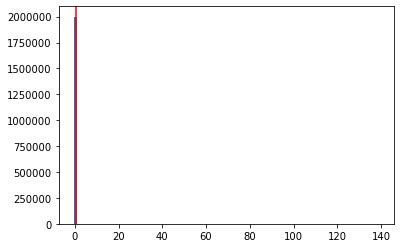

Minimum:   -3.5593681
Maximum:   3.2639346


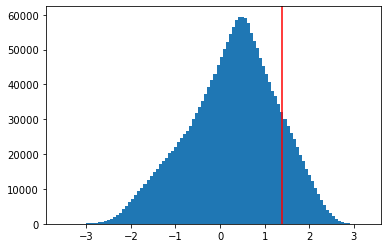

Minimum:   -2.3137398
Maximum:   6.5089865


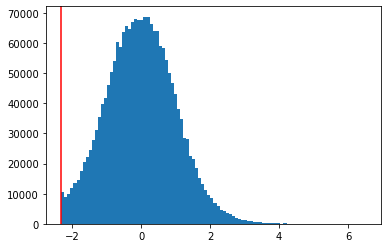

Minimum:   -2.2094815
Maximum:   6.721323


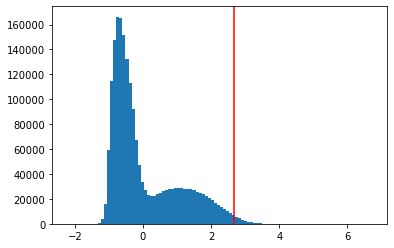

Minimum:   -0.77867705
Maximum:   3.452535


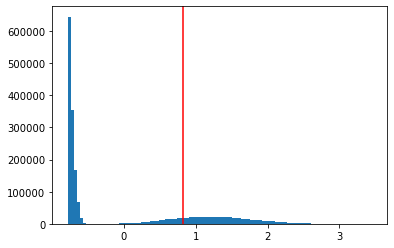

Minimum:   -9.562269
Maximum:   8.465754


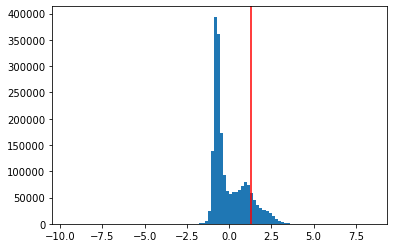

Minimum:   -1.0408449
Maximum:   23.656023


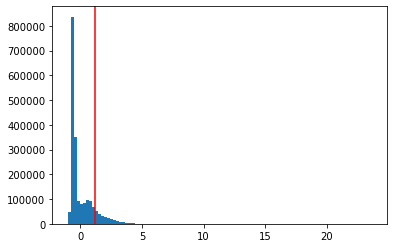

Minimum:   -0.4291234
Maximum:   199.71521


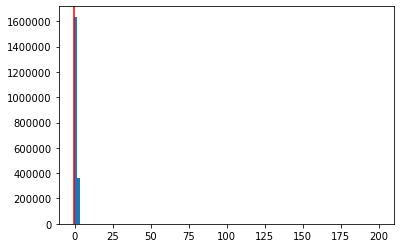

Minimum:   -2.864198
Maximum:   4.4574656


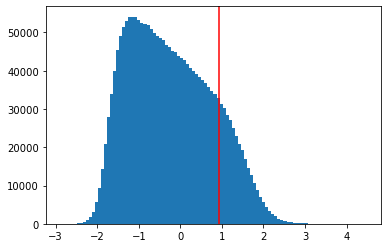

Minimum:   -2.3227656
Maximum:   6.5211105


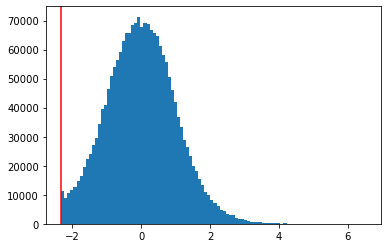

Minimum:   -1.3049
Maximum:   10.440042


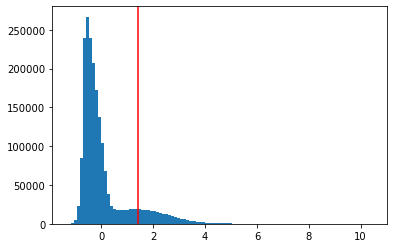

Minimum:   -0.5338708
Maximum:   11.690053


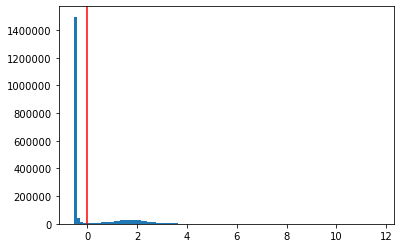

Minimum:   -5.251864
Maximum:   5.298673


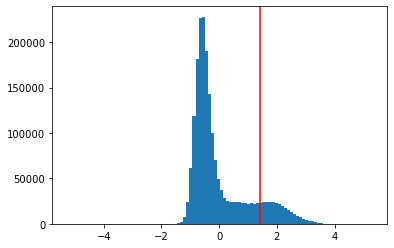

Minimum:   -1.323897
Maximum:   10.143699


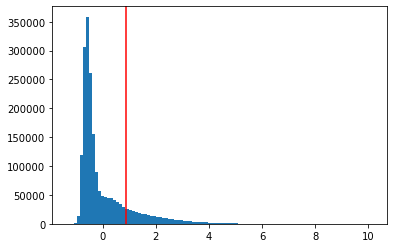

Minimum:   -0.14140789
Maximum:   40.898304


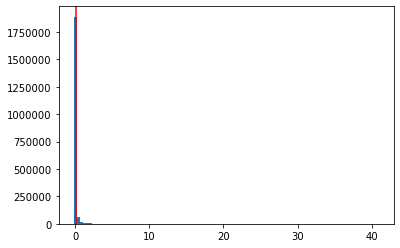

Minimum:   -2.7224436
Maximum:   6.0789685


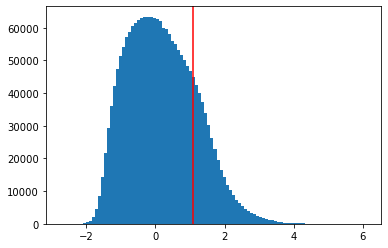

Minimum:   -2.3284283
Maximum:   6.5145946


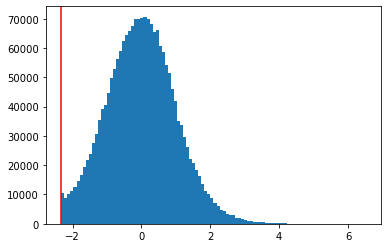

Minimum:   -1.1541102
Maximum:   10.109918


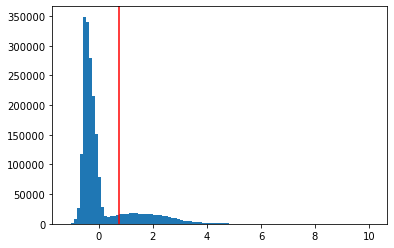

Minimum:   -0.47482955
Maximum:   11.758957


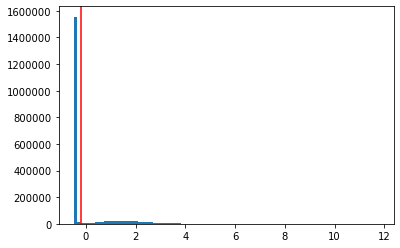

Minimum:   -4.899814
Maximum:   5.746543


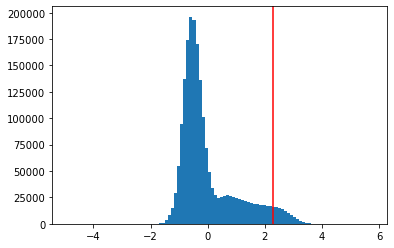

Minimum:   -1.7013155
Maximum:   11.574886


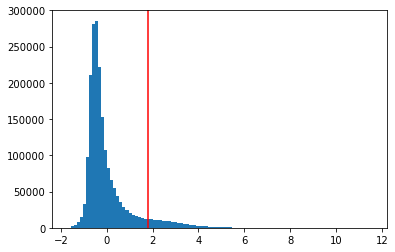

In [25]:
for i in range(35):
    print("Minimum:  ", np.min(x[:, i]))
    print("Maximum:  ", np.max(x[:, i]))
    plt.hist(x[:, i], bins=100)
    plt.axvline(x_o[0, i], color='r')
    plt.show()

## Use this to clean up the data
If a sample is larger than 10 standard deviations away from the mean -> discard it because it might break training.

In [81]:
no_value_too_large = np.all(x < 10.0, axis=1)

In [89]:
x_clear = x_not_standardized[no_value_too_large].numpy()
x_clear_standardized = x[no_value_too_large]
theta_clear = theta_not_standardized[no_value_too_large].numpy()

In [90]:
x_clear.shape

(1994107, 35)

In [91]:
no_value_too_small = np.all(x_clear_standardized > -10.0, axis=1)
x_fully_clear = x_clear[no_value_too_small]
theta_fully_clear = theta_clear[no_value_too_small]

In [93]:
x_fully_clear.shape

(1994107, 35)

In [94]:
np.savez('../results/cleaned_up_data.npz', data=x_fully_clear, params=theta_fully_clear)

### Repeat the whole analysis with the cleaned up dataset just to be sure everything worked

In [95]:
data = np.load('../results/cleaned_up_data.npz', allow_pickle=True)

x = torch.as_tensor(data['data'], dtype=torch.float32)
theta_not_standardized = torch.as_tensor(data['params'], dtype=torch.float32)

In [96]:
x_mean = x.mean(dim=0)
x_std = x.std(dim=0)

x = (x-x_mean) / x_std
x = x.numpy()

Minimum:   -0.7491827
Maximum:   15.098346


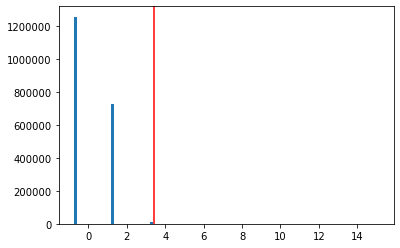

Minimum:   -3.4850597
Maximum:   3.2186239


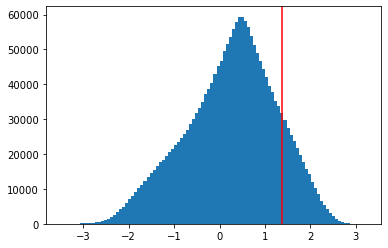

Minimum:   -2.312194
Maximum:   6.5141745


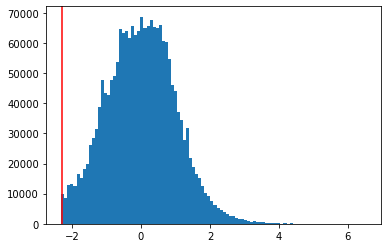

Minimum:   -1.6405475
Maximum:   4.757617


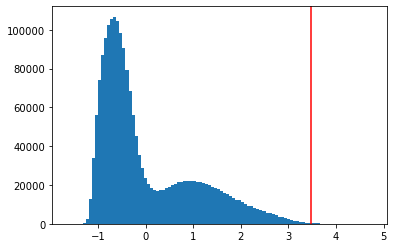

Minimum:   -0.7764986
Maximum:   3.3263464


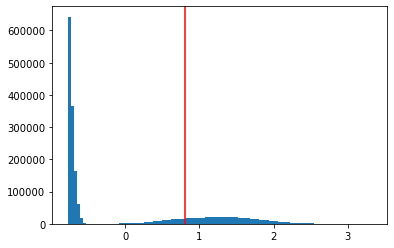

Minimum:   -2.5374699
Maximum:   3.998753


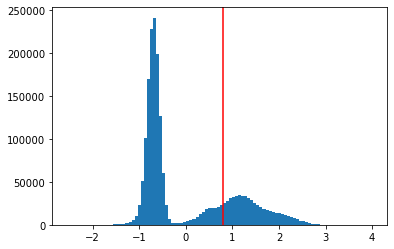

Minimum:   -1.0333936
Maximum:   8.258636


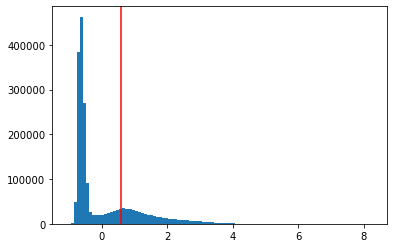

Minimum:   -0.51993704
Maximum:   10.711425


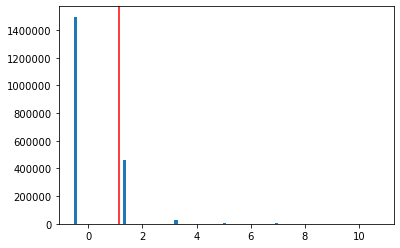

Minimum:   -3.3167233
Maximum:   3.9074492


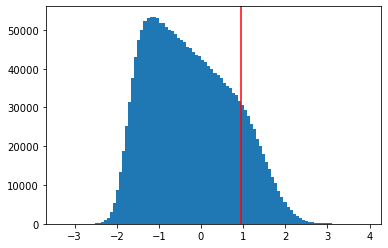

Minimum:   -2.3069365
Maximum:   6.505647


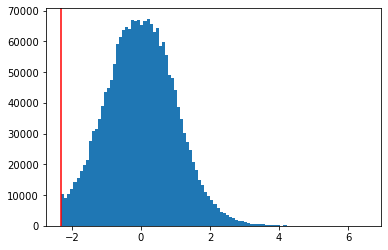

Minimum:   -1.2582679
Maximum:   7.2464204


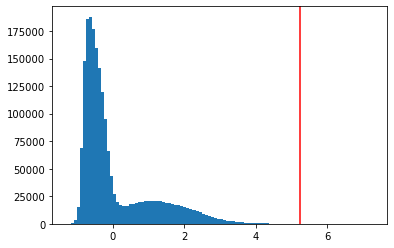

Minimum:   -0.62890446
Maximum:   10.002397


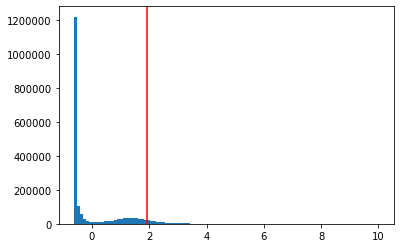

Minimum:   -3.1672392
Maximum:   4.198295


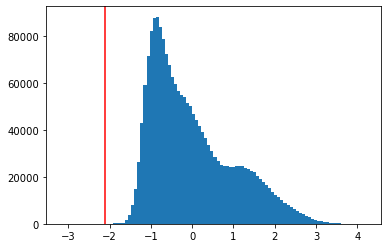

Minimum:   -1.5784037
Maximum:   8.241055


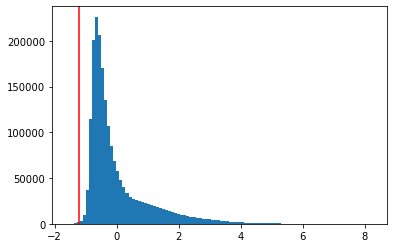

Minimum:   -0.7644768
Maximum:   15.790208


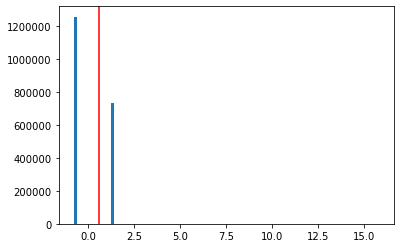

Minimum:   -3.5725923
Maximum:   3.256124


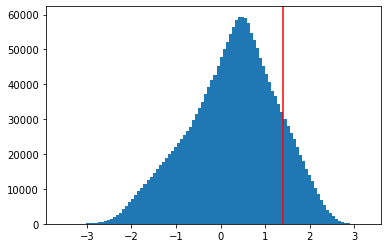

Minimum:   -2.31447
Maximum:   6.5093427


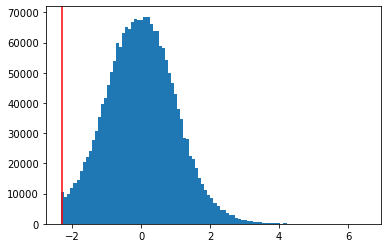

Minimum:   -2.046097
Maximum:   4.4125724


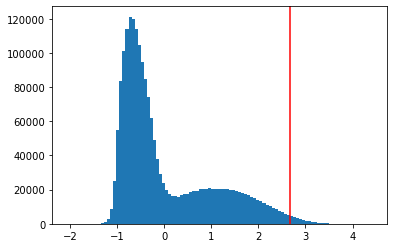

Minimum:   -0.7764618
Maximum:   3.4530218


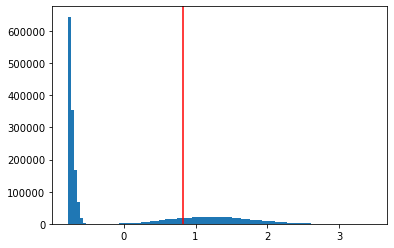

Minimum:   -3.2631607
Maximum:   5.532653


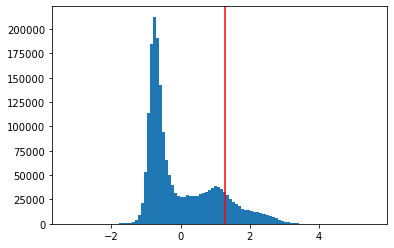

Minimum:   -1.0640097
Maximum:   10.29999


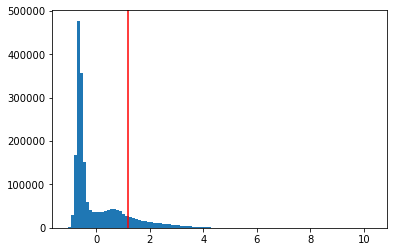

Minimum:   -0.4674362
Maximum:   9.898296


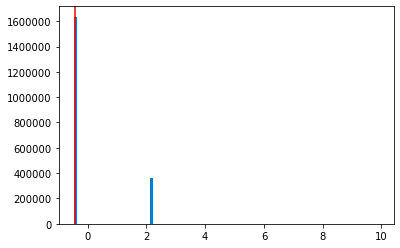

Minimum:   -2.8786435
Maximum:   3.9845917


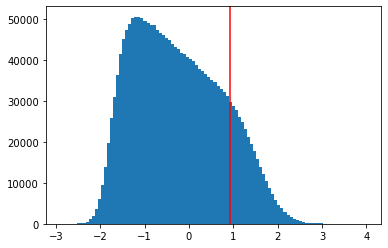

Minimum:   -2.3235354
Maximum:   6.522075


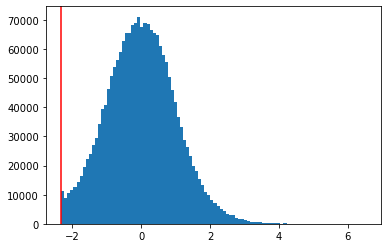

Minimum:   -1.3338293
Maximum:   7.3216367


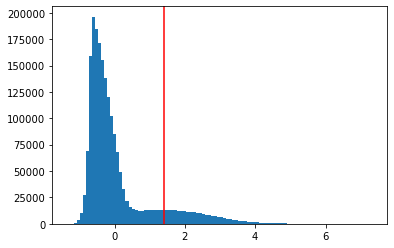

Minimum:   -0.53141105
Maximum:   8.896303


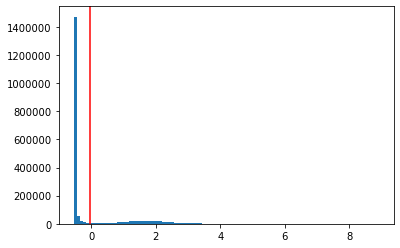

Minimum:   -3.1454208
Maximum:   4.124383


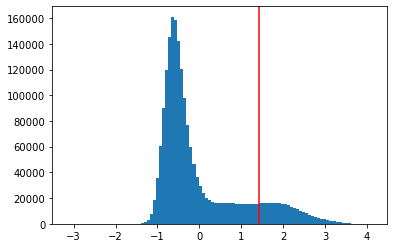

Minimum:   -1.276171
Maximum:   7.311246


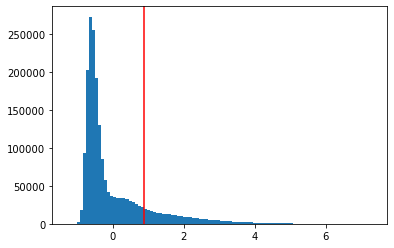

Minimum:   -0.22606358
Maximum:   22.642088


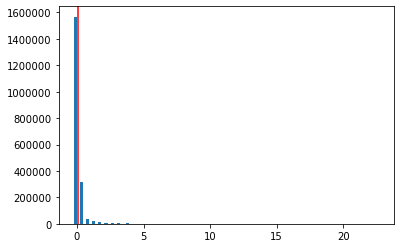

Minimum:   -2.716357
Maximum:   5.644321


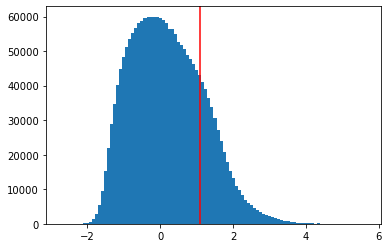

Minimum:   -2.3292427
Maximum:   6.515485


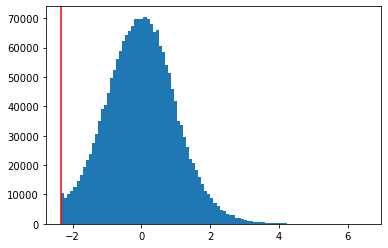

Minimum:   -1.1880482
Maximum:   8.094789


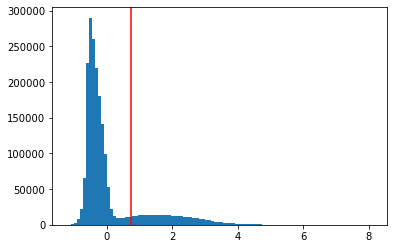

Minimum:   -0.47290722
Maximum:   9.926482


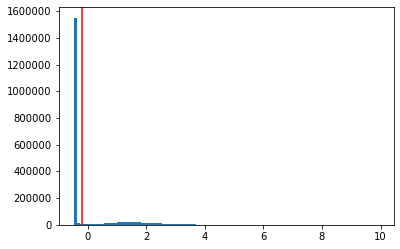

Minimum:   -4.0208244
Maximum:   4.241063


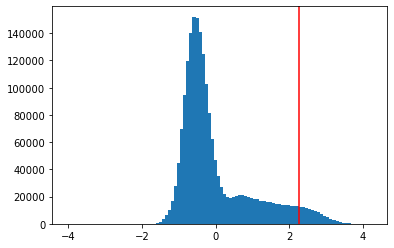

Minimum:   -1.6534542
Maximum:   8.8024435


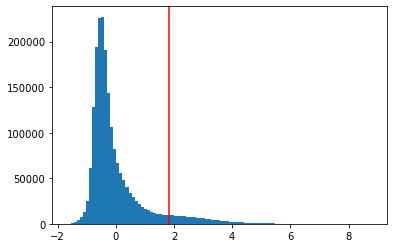

In [97]:
for i in range(35):
    print("Minimum:  ", np.min(x[:, i]))
    print("Maximum:  ", np.max(x[:, i]))
    plt.hist(x[:, i], bins=100)
    plt.axvline(x_o[0, i], color='r')
    plt.show()